In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [81]:
df = yf.download('GOTO.JK')['Adj Close']

[*********************100%***********************]  1 of 1 completed


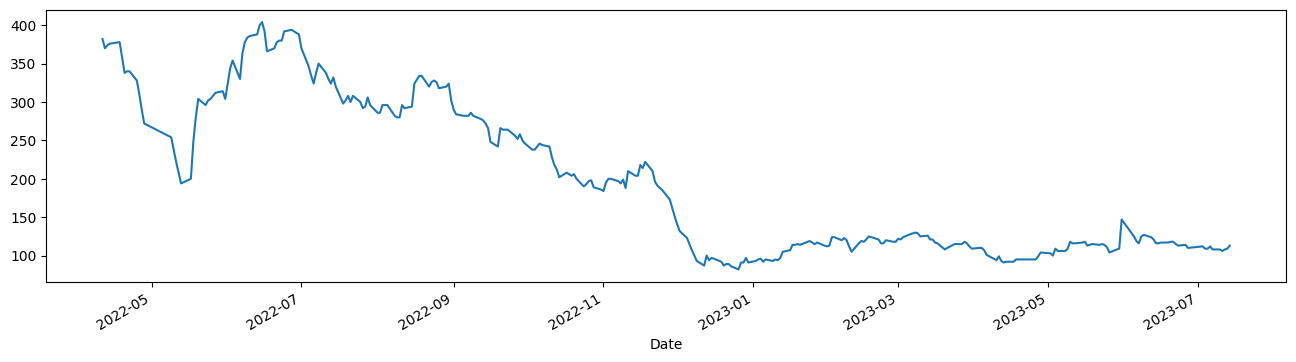

In [82]:
df.plot(figsize=(16,4))
plt.show()

In [83]:
df = pd.DataFrame(df)

In [84]:
df['shift 1'] = df.shift(1)
df['shift 2'] = df['shift 1'].shift(1)
df['shift 3'] = df['shift 2'].shift(1)
df['shift 4'] = df['shift 3'].shift(1)
df['shift 5'] = df['shift 4'].shift(1)

In [85]:
df.head(10)

,Adj Close,shift 1,shift 2,shift 3,shift 4,shift 5
Date,,,,,,
2022-04-11,382.0,NaN,NaN,NaN,NaN,NaN
2022-04-12,370.0,382.0,NaN,NaN,NaN,NaN
2022-04-13,374.0,370.0,382.0,NaN,NaN,NaN
2022-04-14,376.0,374.0,370.0,382.0,NaN,NaN
2022-04-18,378.0,376.0,374.0,370.0,382.0,NaN
2022-04-19,358.0,378.0,376.0,374.0,370.0,382.0
2022-04-20,338.0,358.0,378.0,376.0,374.0,370.0
2022-04-21,340.0,338.0,358.0,378.0,376.0,374.0
2022-04-22,340.0,340.0,338.0,358.0,378.0,376.0


In [86]:
df.isnull().sum()

Adj Close    0
shift 1      1
shift 2      2
shift 3      3
shift 4      4
shift 5      5
dtype: int64

In [87]:
df = df.dropna()

In [88]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [89]:
x = df.drop(['Adj Close'], axis=1).values
y = df['Adj Close'].values

In [90]:
point = int(0.9*len(x))
x_train, x_test = x[:point], x[point:]
y_train, y_test = y[:point], y[point:]

In [91]:
reg = Lasso()

In [92]:
reg.fit(x_train, y_train)

Lasso()

In [93]:
prediction = reg.predict(x_test)

In [94]:
r2_score(y_test, prediction)

-0.3669320907840301

In [95]:
n_train = np.arange(start=0,stop=len(y_train), step=1)
n_test = np.arange(start=len(n_train),stop=(len(n_train)+len(y_test)), step=1)
n_prediction = np.arange(start=len(n_train),stop=(len(n_train)+len(y_test)), step=1)
n_forecast = np.arange(start=len(n_train),stop=(len(n_train)+len(y_test)), step=1)

In [96]:
train = pd.DataFrame(y_train, index=n_train)
test = pd.DataFrame(y_test, index=n_test)
prediction = pd.DataFrame(prediction, index=n_prediction)
# forecast = pd.DataFrame(forecast, index=n_test)

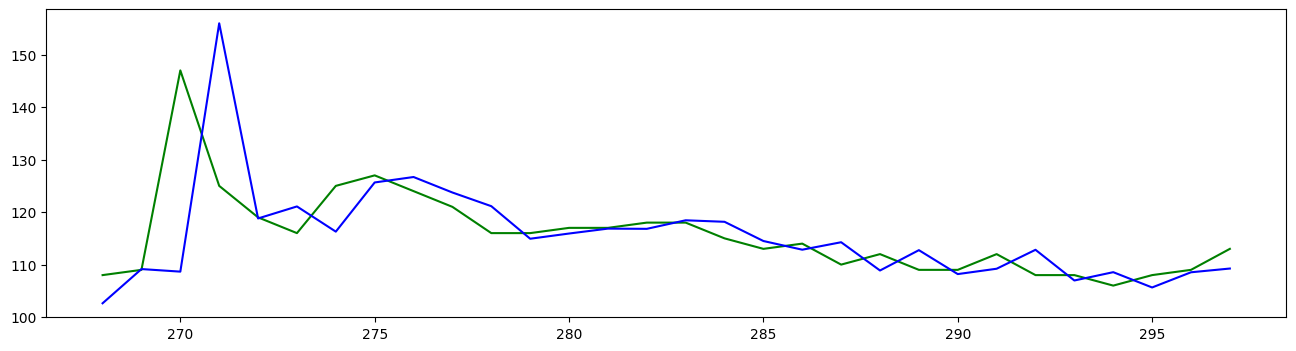

In [97]:
plt.figure(figsize=(16,4))
plt.plot(test, color='g')
plt.plot(prediction, color='b')
plt.show()

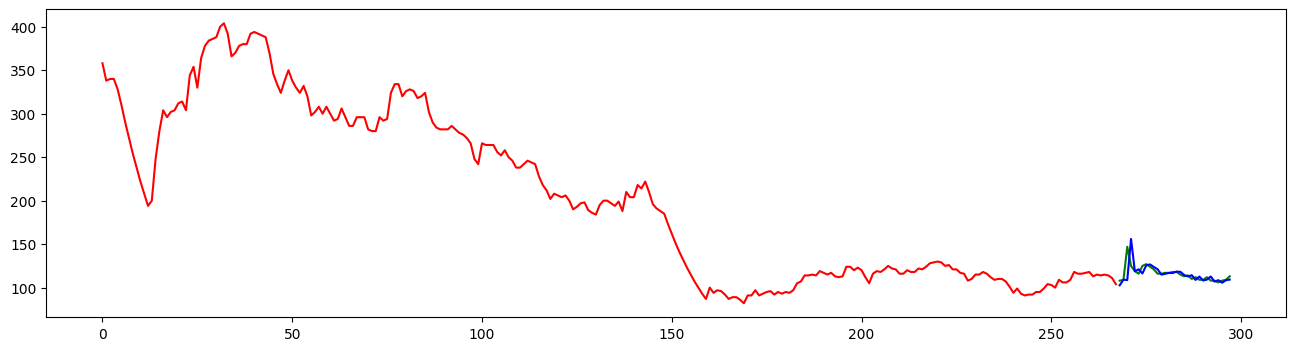

In [98]:
plt.figure(figsize=(16,4))
plt.plot(train, color='r')
plt.plot(test, color='g')
plt.plot(prediction, color='b')
plt.show()